### **Credit Score (rating a consumer's creditworthiness)**

In [29]:
# Problem Type: Classification Problem 
# Goal: Predicting Credit Score using Machine Learning Models

In [30]:
# Importing Necessary Libraries (Data Manipulation & Visualization)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Necessary Libraries (Machine Learning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier   # for classification problem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression   # for classification problem
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score    # for statistics
from sklearn.metrics import classification_report   # for classification problem
from sklearn import metrics
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)

%matplotlib inline


# Display option settings for writing
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '(:.2f)'.format

import warnings
warnings.filterwarnings('ignore')


### **Importing Dataset**

In [33]:
import os

In [36]:
os.chdir("/Users/victoriaoluwakemibabalola/Downloads/VVIP/Personal Development/fin-ML")
os.getcwd()

'/Users/victoriaoluwakemibabalola/Downloads/VVIP/Personal Development/fin-ML'

In [37]:
# Save to a CSV file for future use
df_train = pd.read_csv("/Users/victoriaoluwakemibabalola/Downloads/VVIP/Personal Development/fin-ML/credit_scoring/train.csv", sep = ",")
df_test = pd.read_csv("/Users/victoriaoluwakemibabalola/Downloads/VVIP/Personal Development/fin-ML/credit_scoring/test.csv", sep = ",")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/victoriaoluwakemibabalola/Downloads/VVIP/Personal Development/fin-ML/credit_scoring/train.csv'

In [38]:
df_train.columns

Index(['id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score'],
      dtype='object')

In [39]:
df_train.head(2)   # make 2 to see properly

,id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,January,23,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,(:.2f),_,809.98,(:.2f),No,(:.2f),80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [40]:
df_train.tail(2)    # let's see the last 2 rows

,id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
99998,0x25fec,July,25,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,(:.2f),Good,502.38,(:.2f),No,(:.2f),251.67258219721603,Low_spent_Large_value_payments,(:.2f),Standard
99999,0x25fed,August,25,Mechanic,39628.99_,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,(:.2f),Good,502.38,(:.2f),No,(:.2f),167.1638651610451,!@9#%8,(:.2f),Poor


In [41]:
df_test.head(2)   # make 2 to see properly

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,(:.2f),Good,809.98,(:.2f),22 Years and 9 Months,No,(:.2f),236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,(:.2f),Good,809.98,(:.2f),22 Years and 10 Months,No,(:.2f),21.465380264657146,High_spent_Medium_value_payments,361.44400385378196


In [42]:
df_test.tail()    # let's see the last 2 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,(:.2f),10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,(:.2f),_,3571.7,(:.2f),NaN,Yes,(:.2f),146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,(:.2f),Good,502.38,(:.2f),31 Years and 11 Months,NM,(:.2f),181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,(:.2f),Good,502.38,(:.2f),32 Years and 0 Months,No,(:.2f),__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,(:.2f),Good,502.38,(:.2f),32 Years and 1 Months,No,(:.2f),97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",22,5,11.5,(:.2f),_,502.38,(:.2f),32 Years and 2 Months,No,(:.2f),220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [43]:
df_train.columns = [x.lower() for x in df_train.columns]

In [44]:
df_train.columns

Index(['id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score'],
      dtype='object')

In [45]:
# By inspection, VVIPS
# credit history age
# payment of minimum amount

### **Data Quality Check**

In [46]:
df_train.shape   # not all of these columns will be used

(99616, 24)

In [47]:
# Dropping not needed columns
df_train.drop(["customer_id", "name", "ssn", "credit_history_age"], axis = 1, inplace = True)

KeyError: "['customer_id', 'name', 'ssn', 'credit_history_age'] not found in axis"

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99616 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        99616 non-null  object 
 1   month                     99616 non-null  object 
 2   age                       99616 non-null  object 
 3   occupation                99616 non-null  object 
 4   annual_income             99616 non-null  object 
 5   monthly_inhand_salary     84942 non-null  float64
 6   num_bank_accounts         99616 non-null  int64  
 7   num_credit_card           99616 non-null  int64  
 8   interest_rate             99616 non-null  int64  
 9   num_of_loan               99616 non-null  object 
 10  type_of_loan              88494 non-null  object 
 11  delay_from_due_date       99616 non-null  int64  
 12  num_of_delayed_payment    92867 non-null  object 
 13  changed_credit_limit      99616 non-null  object 
 14  num_credit_

In [49]:
df_train.duplicated().value_counts()   # how many duplicated values do we have in our dataset

False    99616
Name: count, dtype: int64

In [50]:
df_train.isnull().sum().reset_index().rename(columns={"index": "feature_name", 0: "null_counts"})

,feature_name,null_counts
0,id,0
1,month,0
2,age,0
3,occupation,0
4,annual_income,0
5,monthly_inhand_salary,14674
6,num_bank_accounts,0
7,num_credit_card,0
8,interest_rate,0
9,num_of_loan,0


To drop columns with missing rows, you can filter out the columns where the `null_counts` is greater than 0. Here's the code to achieve this:



In [51]:
# Drop columns with missing rows
columns_to_drop = ['monthly_inhand_salary', 'type_of_loan', 'num_of_delayed_payment', 
                   'num_credit_inquiries', 'amount_invested_monthly', 'monthly_balance']

# Drop the columns from the DataFrame
df_train_cleaned = df_train.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df_train_cleaned.head()

,id,month,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,changed_credit_limit,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,payment_behaviour,credit_score
0,0x1602,January,23,Scientist,19114.12,3,4,3,4,3,11.27,_,809.98,(:.2f),No,(:.2f),High_spent_Small_value_payments,Good
1,0x1603,February,23,Scientist,19114.12,3,4,3,4,-1,11.27,Good,809.98,(:.2f),No,(:.2f),Low_spent_Large_value_payments,Good
2,0x1604,March,-500,Scientist,19114.12,3,4,3,4,3,_,Good,809.98,(:.2f),No,(:.2f),Low_spent_Medium_value_payments,Good
3,0x1605,April,23,Scientist,19114.12,3,4,3,4,5,6.27,Good,809.98,(:.2f),No,(:.2f),Low_spent_Small_value_payments,Good
4,0x1606,May,23,Scientist,19114.12,3,4,3,4,6,11.27,Good,809.98,(:.2f),No,(:.2f),High_spent_Medium_value_payments,Good




This will remove all columns with missing values from your dataset. Let me know if you need further assistance!

In [52]:
df_train.shape[0]

99616

In [53]:
# Dropping the null values (with threshold) should there be missing values
size_before_cleaning = df_train.shape   # dimension of the dataframe
df_train = df_train[df_train.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - df_train.shape[0]))

0 Records dropped


In [54]:
df_train.isnull().sum().reset_index().rename(columns={"index": "feature_name", 0: "null_counts"})

,feature_name,null_counts
0,id,0
1,month,0
2,age,0
3,occupation,0
4,annual_income,0
5,monthly_inhand_salary,14674
6,num_bank_accounts,0
7,num_credit_card,0
8,interest_rate,0
9,num_of_loan,0


In [55]:
df_train.head()

,id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,January,23,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,(:.2f),_,809.98,(:.2f),No,(:.2f),80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,(:.2f),Good,809.98,(:.2f),No,(:.2f),81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,May,23,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [56]:
df_train.tail()

,id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
99995,0x25fe9,April,25,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,(:.2f),_,502.38,(:.2f),No,(:.2f),60.97133255718485,High_spent_Large_value_payments,(:.2f),Poor
99996,0x25fea,May,25,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,(:.2f),_,502.38,(:.2f),No,(:.2f),54.18595028760385,High_spent_Medium_value_payments,(:.2f),Poor
99997,0x25feb,June,25,Mechanic,39628.99,(:.2f),4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,(:.2f),Good,502.38,(:.2f),No,(:.2f),24.02847744864441,High_spent_Large_value_payments,(:.2f),Poor
99998,0x25fec,July,25,Mechanic,39628.99,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,(:.2f),Good,502.38,(:.2f),No,(:.2f),251.67258219721603,Low_spent_Large_value_payments,(:.2f),Standard
99999,0x25fed,August,25,Mechanic,39628.99_,(:.2f),4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,(:.2f),Good,502.38,(:.2f),No,(:.2f),167.1638651610451,!@9#%8,(:.2f),Poor


In [57]:
# Inspect each column for possible cleaning
df_train["age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [58]:
df_train["age"].value_counts()

age
38       2825
28       2821
31       2796
26       2785
32       2740
         ... 
3988_       1
1908        1
4583_       1
7549        1
1342        1
Name: count, Length: 1781, dtype: int64

In [59]:
df_train["age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [60]:
def clean_age(col):
    if "_" in str(col):
        return str(col).split("_")[0]
    elif "-" in str(col):
        return str(col).split("-")[-1]
    return str(col)

In [61]:
df_train["age"] = df_train["age"].apply(clean_age)

In [62]:
# Check changes on col "age" after cleaning
df_train["age"].unique()

array(['23', '500', '28', ..., '4808', '2263', '1342'], dtype=object)

# **Continue from here**

In [64]:
# Defining a function to clean some of the columns
def amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [65]:
df_train["amount_invested_monthly"] = df_train["amount_invested_monthly"].apply(amount_invested_monthly)
df_train["amount_invested_monthly"] = df_train["amount_invested_monthly"].astype("float")

In [66]:
df_train.head()

,id,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,January,23,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,(:.2f),_,809.98,(:.2f),No,(:.2f),(:.2f),High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),(:.2f),Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,March,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,(:.2f),Good,809.98,(:.2f),No,(:.2f),(:.2f),Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),(:.2f),Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,May,23,Scientist,19114.12,(:.2f),3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,(:.2f),Good,809.98,(:.2f),No,(:.2f),(:.2f),High_spent_Medium_value_payments,341.48923103222177,Good


In [225]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif "_" in str(value):
        return str(value).replace("_", "")
    elif str(value) == "_":
        return str(value)
    else:
        return str(value)

In [227]:
df["num_of_delayed_payment"] = df["num_of_delayed_payment"].apply(filter_delayed_payments)
df["num_of_delayed_payment"] = df["num_of_delayed_payment"].astype(np.float64)

In [231]:
def filter_general(value):
    if "-" in str(value):
        return str(value).split("-")[1]
    elif "_" in str(value):
        return str(value).split("_")[1]
    else:
        return str(value)

In [233]:
df.drop(df[df["monthly_balance"] == "__-3333333333333333__"].index, inplace = True)
for i in ["age", "annual_income", "num_of_loan", "outstanding_debt", "monthly_balance"]:
    df[i] = df[i].apply(filter_general)
    df[i] = df[i].astype(np.float64)
    print(i + ": Successfully Cleaned")
    

age: Successfully Cleaned
annual_income: Successfully Cleaned
num_of_loan: Successfully Cleaned
outstanding_debt: Successfully Cleaned
monthly_balance: Successfully Cleaned


In [235]:
df["changed_credit_limit"] = df["changed_credit_limit"].apply(lambda x:str(x).split("-")[-1])
df.drop(df[df["changed_credit_limit"] == "_"].index, inplace = True)
df["changed_credit_limit"] = df["changed_credit_limit"].astype("float")

In [237]:
df['occupation'] = df['occupation'].replace('______', np.nan)
df['occupation'] = df['occupation'].fillna(np.random.choice(pd.Series([
    'Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
    'Developer', 'Lawyer', 'Media_Manager', 'Doctor',
    'Journalist', 'Manager', 'Accountant', 'Musician',
    'Mechanic', 'Writer', 'Architect'
])))

In [239]:
df['credit_mix'] = df['credit_mix'].replace('_', np.nan)
df['credit_mix'] = df['credit_mix'].fillna(np.random.choice(pd.Series([
    'Standard', 'Good', 'Bad'
])))

In [241]:
df['payment_of_min_amount'] = df['payment_of_min_amount'].replace('NM', np.nan)
df['payment_of_min_amount'] = df['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [243]:
df['payment_behaviour'] = df['payment_behaviour'].replace('@#%$', np.nan)
df['payment_behaviour'] = df['payment_behaviour'].fillna(np.random.choice(pd.Series([
    'High_spent_Small_value_payments', 'Low_spent_Small_value_payments',
    'High_spent_Medium_value_payments', 'Low_spent_Large_value_payments',
    'High_spent_Large_value_payments', 'Low_spent_Medium_value_payments'
])))

In [245]:
for i in ['monthly_inhand_salary', 'num_of_delayed_payment', 'num_credit_inquiries',
          'amount_invested_monthly', 'monthly_balance']:
    df[i].fillna(df[i].median(), inplace=True)

In [247]:
df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,(:.2f),Lawyer,(:.2f),(:.2f),9,1,10,(:.2f),7,(:.2f),(:.2f),9,Fair,(:.2f),(:.2f),Yes,(:.2f),(:.2f),High_spent_Medium_value_payments,(:.2f)
1,(:.2f),Engineer,(:.2f),(:.2f),6,5,13,(:.2f),7,(:.2f),(:.2f),6,Good,(:.2f),(:.2f),No,(:.2f),(:.2f),High_spent_Medium_value_payments,(:.2f)
2,(:.2f),Doctor,(:.2f),(:.2f),5,3,6,(:.2f),8,(:.2f),(:.2f),7,Fair,(:.2f),(:.2f),No,(:.2f),(:.2f),Low_spent_Small_value_payments,(:.2f)
3,(:.2f),Lawyer,(:.2f),(:.2f),6,1,13,(:.2f),19,(:.2f),(:.2f),5,Good,(:.2f),(:.2f),No,(:.2f),(:.2f),Low_spent_Small_value_payments,(:.2f)
4,(:.2f),Banker,(:.2f),(:.2f),7,3,16,(:.2f),4,(:.2f),(:.2f),3,Fair,(:.2f),(:.2f),Yes,(:.2f),(:.2f),High_spent_Medium_value_payments,(:.2f)


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       50000 non-null  float64
 1   occupation                50000 non-null  object 
 2   annual_income             50000 non-null  float64
 3   monthly_inhand_salary     50000 non-null  float64
 4   num_bank_accounts         50000 non-null  int64  
 5   num_credit_card           50000 non-null  int64  
 6   interest_rate             50000 non-null  int64  
 7   num_of_loan               50000 non-null  float64
 8   delay_from_due_date       50000 non-null  int64  
 9   num_of_delayed_payment    50000 non-null  float64
 10  changed_credit_limit      50000 non-null  float64
 11  num_credit_inquiries      50000 non-null  int64  
 12  credit_mix                50000 non-null  object 
 13  outstanding_debt          50000 non-null  float64
 14  credit

### **Exploratory Data Analysis (Categorical Variables)**

In [252]:
df_cat = df.select_dtypes(include = "object") 
df_num = df.select_dtypes(include = "number")

In [254]:
df_cat.describe().T

,count,unique,top,freq
occupation,50000,7,Doctor,7208
credit_mix,50000,3,Bad,16753
payment_of_min_amount,50000,2,Yes,25024
payment_behaviour,50000,3,High_spent_Medium_value_payments,16950


In [256]:
for cat_col in df_cat:
    print(df_cat[cat_col].value_counts())
    print("\n-----------------")

occupation
Doctor       7208
Teacher      7180
Artist       7167
Lawyer       7117
Banker       7114
Scientist    7112
Engineer     7102
Name: count, dtype: int64

-----------------
credit_mix
Bad     16753
Good    16630
Fair    16617
Name: count, dtype: int64

-----------------
payment_of_min_amount
Yes    25024
No     24976
Name: count, dtype: int64

-----------------
payment_behaviour
High_spent_Medium_value_payments     16950
Medium_spent_Large_value_payments    16570
Low_spent_Small_value_payments       16480
Name: count, dtype: int64

-----------------


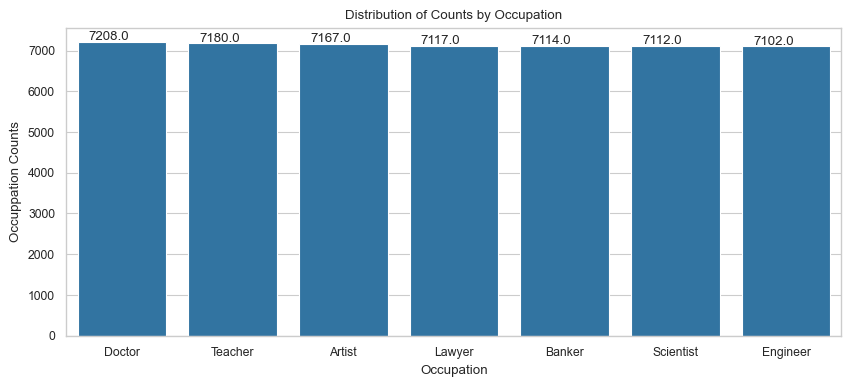

In [258]:
# Visualizing the data
# Occupation
plt.figure(figsize = (10, 4))
ax = sns.countplot(x = "occupation", data = df_cat, order = df["occupation"].value_counts().index)
plt.title("Distribution of Counts by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Occuppation Counts")
for p in ax.patches:
    ax.annotate("{}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))

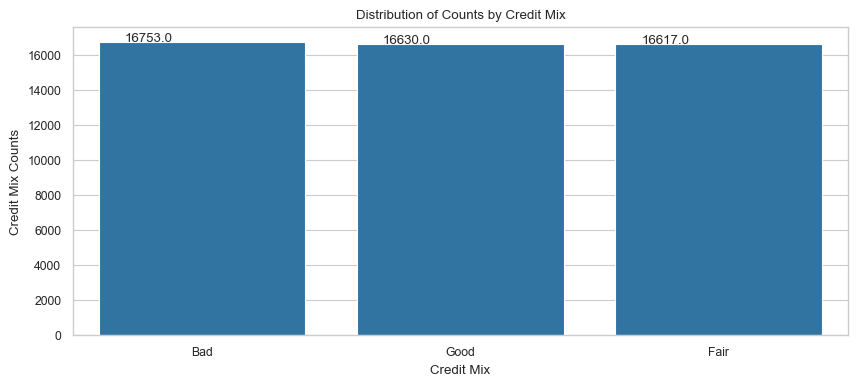

In [260]:
# Credit Mix
plt.figure(figsize=(10,4))
ax = sns.countplot(x='credit_mix', data=df_cat, order=df['credit_mix'].value_counts().index)
plt.title('Distribution of Counts by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Mix Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

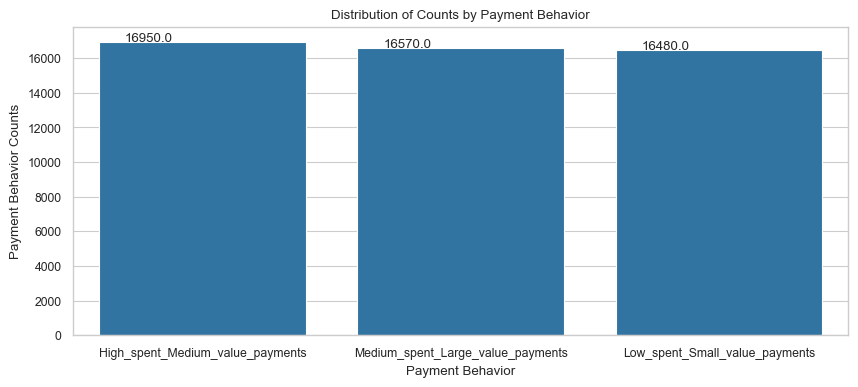

In [262]:
# Payment Behaviour
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_behaviour', data=df_cat, order=df['payment_behaviour'].value_counts().index)
plt.title('Distribution of Counts by Payment Behavior')
plt.xlabel('Payment Behavior')
plt.ylabel('Payment Behavior Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [266]:
df_cat.columns

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour'],
      dtype='object')

In [268]:
# # Changed Credit Limit
# plt.figure(figsize=(10,4))
# ax = sns.countplot(x = "changed_credit_Limit", data = df_cat, order = df["changed_credit_Limit"].value_counts().iloc[:20].index)
# plt.title("Distribution of Counts by Changed Credit Limit")
# plt.xlabel("Changed Credit Limit")
# plt.ylabel("Changed Credit Limit Counts")
# for p in ax.patches:
#     ax.annotate("{}".format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))

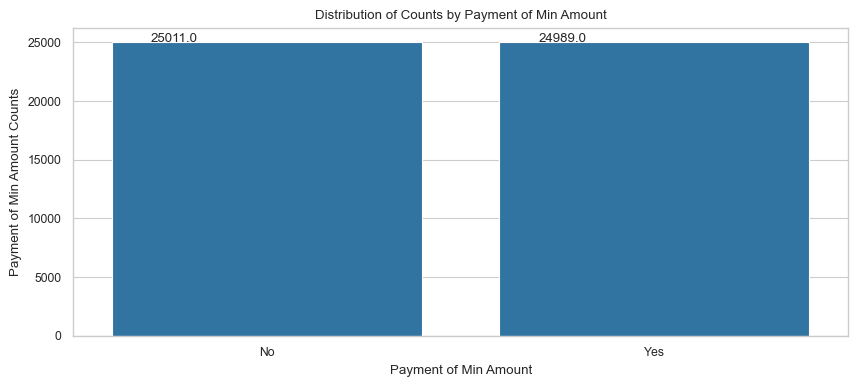

In [172]:
# Payment of Min Amount
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_of_min_amount', data=df_cat, order=df['payment_of_min_amount'].value_counts().index)
plt.title('Distribution of Counts by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Payment of Min Amount Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [170]:
df_cat.columns

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour'],
      dtype='object')

In [174]:
df.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance'],
      dtype='object')

In [176]:
df[["changed_credit_limit"]]

,changed_credit_limit
0,(:.2f)
1,(:.2f)
2,(:.2f)
3,(:.2f)
4,(:.2f)
...,...
49995,(:.2f)
49996,(:.2f)
49997,(:.2f)
49998,(:.2f)


In [270]:
df.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance'],
      dtype='object')